In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(256, 256)
PSNR value is 22.11425520264008 dB


Text(0.5, 1.0, 'Noisy image')

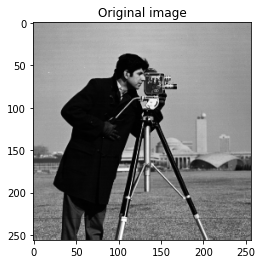

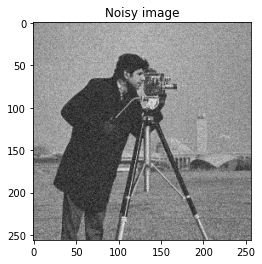

In [19]:
from skimage.io import imread
import numpy as np
from scipy.fftpack import dct, idct
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
import time
import cv2
import numpy as np
import os
from math import log10, sqrt

# definition of dct2 and idct2 (not builtin)
def dct2(s):
    return dct(dct(s.T, norm='ortho').T, norm='ortho')


def idct2(x):
    return idct(idct(x.T, norm='ortho').T, norm='ortho')

# useful function for plot the 2D DCT dictionary
def get_dictionary_img(D):
    M = D.shape[0]
    p = int(round(np.sqrt(M)))
    bound = 2
    img = np.ones((p*p+bound*(p-1), p*p+bound*(p-1)))
    for i in range(M):
        m = np.mod(i, p)
        n = int((i-m)/p)
        m = m * p + bound * m
        n = n * p + bound * n
        atom = D[:, i].reshape((p, p))
        if atom.min() < atom.max():
            atom = (atom - atom.min()) / (atom.max() - atom.min())
        img[m: m + p, n: n + p] = atom

    return img


# load the image and rescale it in [0,1]
img = imread('/content/drive/MyDrive/cameraman.png') / 255
# img = imread('BM3D_images/checkerboard.png') / 255
# img = np.roll(img, 1, axis=0)
# img = np.roll(img, 1, axis=1)

# img = imread('BM3D_images/barbara.png') / 255
# img = imread('BM3D_images/Lena512.png') / 255

imsz = img.shape
print(img.shape)
# noise level
sigma_noise = 20/255

# patch size
p = 8

# number of elements in the patchfrom skimage.io import imread
M = p ** 2

# corrupt the image with white gaussian noise
# noisy_img =

def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.1
      gauss = np.random.normal(mean,sigma_noise,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy
   
    
noisy_img = noisy("gauss", img)
# compue the psnr of the noisy input
# psnr_noisy =
def psnr_noisy(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 1
    psnr = 20 * log10(max_pixel**2 / sqrt(mse))
    return psnr
  
def main():
     original = img
     compressed = noisy_img
     value = psnr_noisy(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

plt.figure(1)
plt.imshow(img, cmap='gray')
plt.title('Original image')

plt.figure(2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy image')


NameError: ignored

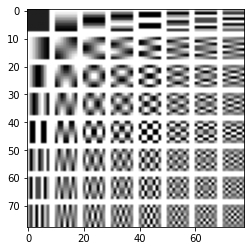

In [23]:
import scipy.io
# generate the DCT basis
D = np.zeros((M, M))
cnt = 0
for i in range(p):
    for j in range(p):
        a = np.zeros((p, p))
        a[i, j] = 1
        D[:, cnt] = idct2(a).reshape(-1)
        cnt = cnt + 1

# display the dct basis
D_img = get_dictionary_img(D)
plt.figure(10)
plt.imshow(D_img, cmap='gray')


# denoising

# initialize the estimated image
img_hat = np.zeros_like(img)

# initialize the weight matrix
weights = np.zeros_like(img)

# set the threshold for the Hard Thresholding
tau = 3 * sigma_noise # Donoho says: sigma * sqrt(2*log(p^2))

# define the step (=p for non overlapping paches)
STEP = p

time_start = time.time()
# operate patch-wise
for i in range(0, imsz[0] - p + 1, STEP):
    for j in range(0, imsz[1] - p + 1, STEP):
        # extrach the patch with the top left corner at pixel (ii, jj)
        # s =
        s = 
        # compute the representation w.r.t. the 2D DCT dictionary
        # x =
        #x = 
        # perform the hard thresholding (do not perform HT on the DC!)
        # x_HT =
        #x_hat = 
        # perform the reconstruction
        # s_hat =
        #s_hat = 
        # compute the weight for the reconstructed patch
        # w =
        

        if w == 0:
            w = 1

        # put the compressed patch into the compressed image using the computed weight
        # UPDATE img_hat

        # store the weight of the current patch in the weight matrix
        # UPDATE weights

# normalize the estimated image with the computed weights
# img_hat =

# compute the psnr of the estimated image
# psnr_hat =
plt.figure(3)
plt.imshow(img_hat, cmap='gray')
plt.title(f'Estimated Image,\nPSNR = {psnr_hat:.2f}')



In [ ]:

###############################################
# compare denoising by DCT agaist smoothing by convolution
# define a filter that by convolution returns the average over a 5x5 region
# h =
# compute the convolution of the noisy image against the averaging filter
img_hat_conv = convolve2d(noisy_img, h, 'same')
# compute PSNR
psnr_hat_conv = 10*np.log10(1 / np.mean((img - img_hat_conv) ** 2))
plt.figure(4)
plt.imshow(img_hat_conv, cmap='gray')
plt.title(f'Estimated Image (conv),\nPSNR = {psnr_hat_conv:.2f}')


##################################################à
# noise estimation
# define the horizontal derivative filter
# h =
h = np.zeros()
# convolve the noisy image and the filter
# differences =
differences = 
# compute sigma as the empirical std
# sigma_hat_emp =
# use MAD to estimate the noise level sigma
# sigma_hat =
sigma_hat = 

print(f'sigma: {sigma_noise:.3f}, sigma_hat (empirical std): {sigma_hat_emp:.3f}, sigma_hat (MAD): {sigma_hat:.3f}')
